33. Emplee la regla compuesta de Simpson con n=14 para calcular el volumen del sólido en el primer octante que está acotada por los planos coordenados y las gráficas de *z= 3-x-y* y *x<sup>2</sup> + y<sup>2</sup> = 1*. Además obtenga el valor exacto y determine el error. Emplee 15 decimales.

### Solución

Planteo la integral:
Dado que está en el primer octante está limitado por los planos coordenados:
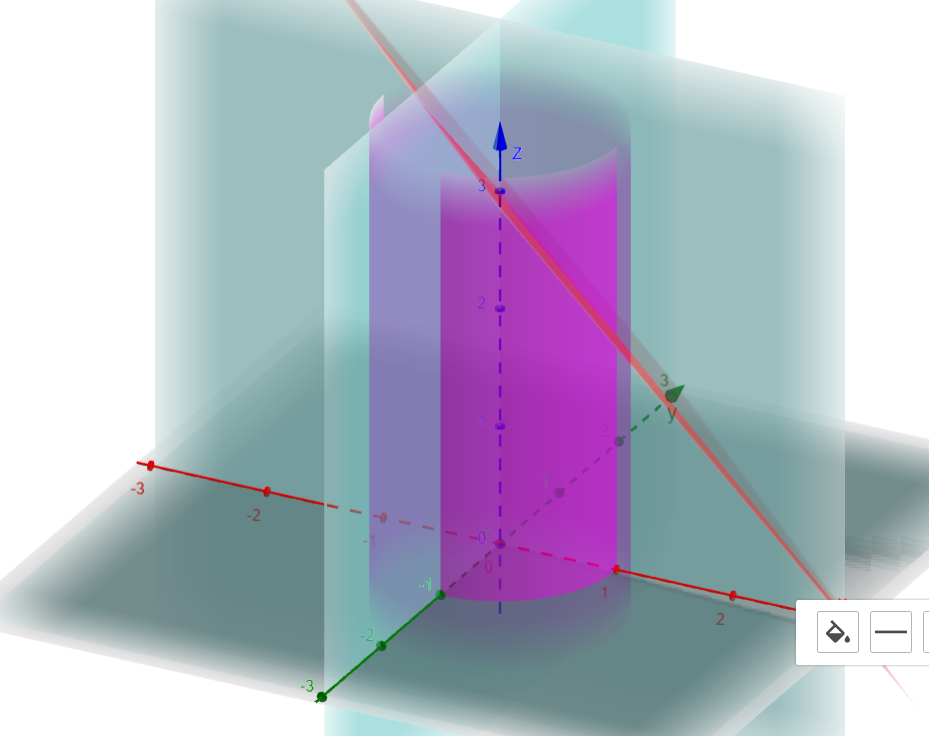

Con la proyección se aprecia que está limitado arriba por *z= 3-x-y* y que lo acota el cilindro *x<sup>2</sup> + y<sup>2</sup> = 1*, esto proyectado en el plano *xy*, despejo en el plano y tengo:

$$ x^2 + y^2 = 1 $$

$$ y = \sqrt{(1-x^2)} $$

Nos daría un cuarto de círculo de radio = 1, por lo tanto la integral sería:

$$ \int_{0}^{1} \int_{0}^{\sqrt{(1-x^2)}} (3 -x -y) dy dx  $$

Ahora soluciono en Python

In [2]:
# nos pide utilizar regla de simpson compuesta con n= 14

from sympy import *

# Declaro la dos variables simbólicas a utilizar
x = symbols("x")
y = symbols("y")


# Defino una función que resuelve la regla compuesta de simpson
# para la variable y
def regla_compuesta_del_simpson_y(f, a, b, n):
    # Defino mi h dentro de la función
    h = (b-a) / n
    # La suma interna es el factor de la fórmula, la inicio con f(x_0)
    suma_interna = f.subs(y, a)
    # Aquí hago las sumatorias desde f(x_1) hasta f(x_(n-1)) y hasta f(x_(n-2))
    # No es necesario el n-2 si n es par así que hago un solo for
    # Recordando que en Python los índices son iguales que en la fórmula
    for i in range(1, n):
        if i%2 == 0:
            suma_interna += 2 * f.subs(y, a + i*h)
        else:
            suma_interna += 4 * f.subs(y, a + i*h)
    # Sumo f(x_n)
    suma_interna += f.subs(y, b)
    return (h/3) * suma_interna

# Declaro mi función de dos variables
f = 3 - x - y
a=0
b= sqrt(1 - x**2)
n = 14

# resuelvo la integral interna
integral_interna = simplify(regla_compuesta_del_simpson_y(f=f, a=a, b=b, n=n))

# Ahora desarrollo la misma función para la variable x
def regla_compuesta_del_simpson(f, a, b, n):
    # Defino mi h dentro de la función
    h = (b-a) / n
    # La suma interna es el factor de la fórmula, la inicio con f(x_0)
    suma_interna = f.subs(x, a)
    # Aquí hago las sumatorias desde f(x_1) hasta f(x_(n-1)) y hasta f(x_(n-2))
    # No es necesario el n-2 si n es par así que hago un solo for
    # Recordando que en Python los índices son iguales que en la fórmula
    for i in range(1, n):
        if i%2 == 0:
            suma_interna += 2 * f.subs(x, a + i*h)
        else:
            suma_interna += 4 * f.subs(x, a + i*h)
    # Sumo f(x_n)
    suma_interna += f.subs(x, b)
    return (h/3) * suma_interna

c = 0
d = 1

volumen_aproximado = round(
    float(
        regla_compuesta_del_simpson(
            f=integral_interna, a=c, b=d, n=n)), 15
)
print(
    f"El volumen aproximado es: "
    f"{volumen_aproximado} unidades cúbicas")

volumne_exacto = round(
    float(integrate(integrate(f, (y, a, b)), (x, c, d))), 15
    )
print(
    f"El volumen exacto es: " 
    f"{volumne_exacto} unidades cúbicas")

error = round(abs(volumne_exacto-volumen_aproximado), 15)
print("El error es:", error)

El volumen aproximado es: 1.685158310699298 unidades cúbicas
El volumen exacto es: 1.689527823525678 unidades cúbicas
El error es: 0.00436951282638
